In [184]:
!pip install graphviz

In [185]:
!pip install scikit-plot

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from  sklearn.metrics import roc_auc_score, roc_curve,recall_score
import scikitplot as skplt 

In [187]:
data=pd.read_excel("Telecom_Churn.xls")

In [188]:
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [189]:
data.info() #there is no missing value> no need to drop any column or observation for N/A

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [190]:
data.var()==0 #As the result shows there is no variable which has the same value for all observations

Account Length    False
VMail Message     False
Day Mins          False
Eve Mins          False
Night Mins        False
Intl Mins         False
CustServ Calls    False
Churn             False
Int'l Plan        False
VMail Plan        False
Day Calls         False
Day Charge        False
Eve Calls         False
Eve Charge        False
Night Calls       False
Night Charge      False
Intl Calls        False
Intl Charge       False
Area Code         False
dtype: bool

In [191]:
data.nunique()

Account Length     212
VMail Message       46
Day Mins          1667
Eve Mins          1611
Night Mins        1591
Intl Mins          162
CustServ Calls      10
Churn                2
Int'l Plan           2
VMail Plan           2
Day Calls          119
Day Charge        1667
Eve Calls          123
Eve Charge        1440
Night Calls        120
Night Charge       933
Intl Calls          21
Intl Charge        162
State               51
Area Code            3
Phone             3333
dtype: int64

In [192]:
data.drop(["Phone"],axis=1,inplace=True) 

As there is one unique phone number for each observation we'll drop it becuase it adds no value to the analysis

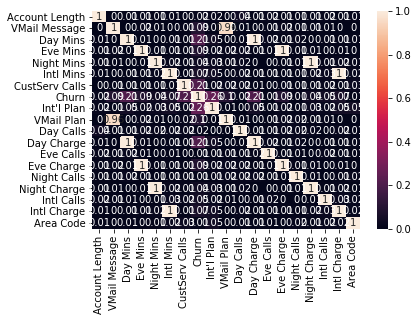

<Figure size 864x648 with 0 Axes>

In [193]:
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.figure(figsize=(12,9))
plt.show()

In [194]:
data.corr()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
Account Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
VMail Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.006174
Int'l Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
VMail Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747


The correlation is the highest for the pairs of (Night Charge,Night Mins), (Intl Charge,Inrl Mins) and (VMail Plan, VMail Message). To decide which one to drop I do boxplot

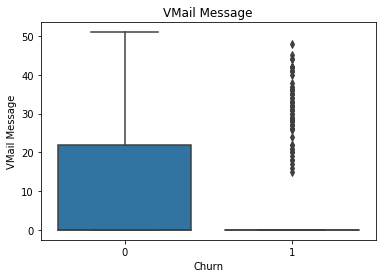

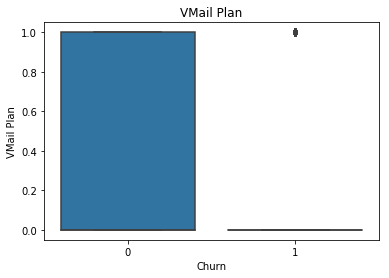

In [195]:
for i in ["VMail Message","VMail Plan"]:
    sns.boxplot(data.Churn,data[i])
    plt.title(i)
    plt.show()

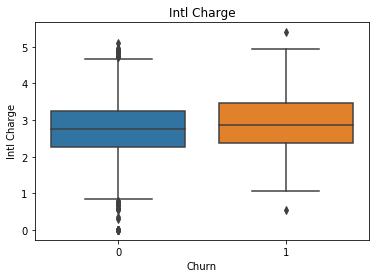

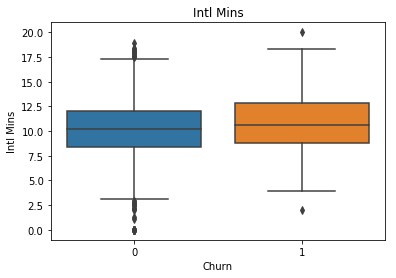

In [196]:
for i in ["Intl Charge","Intl Mins"]:
    sns.boxplot(data.Churn,data[i])
    plt.title(i)
    plt.show()

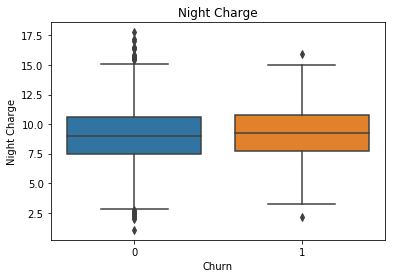

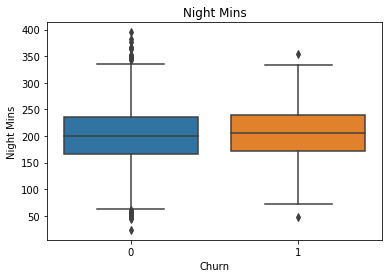

In [197]:
for i in ["Night Charge","Night Mins"]:
    sns.boxplot(data.Churn,data[i])
    plt.title(i)
    plt.show()

The last two plots are not very helpful that's why based on my subjective selection I will delete the "Night charge" and and "Intl charge" becuase I believe that the ones I'll keep are more informative and important. However for the VMail correlation the plot is helpful, as it shows the VMail message has high variance and many outliers that's why I decide to drop "VMail message".

In [198]:
data.drop(["Night Charge","VMail Message","Intl Charge"],axis=1,inplace=True) 

In [199]:
data=pd.get_dummies(data,drop_first=True)
#getting dummy variables from object type variables

In [200]:
Y=data.Churn
X=data.drop("Churn",axis=1)

In [201]:
print(data.Churn.value_counts()/len(data)*100)

0    85.508551
1    14.491449
Name: Churn, dtype: float64


About 85% of customers will not churn.This means that without any model we will probably clasify a new customer as 0 (will stay) with accuracy of 85.5%, hopefully the figures will get better through model.

In [202]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

spliting the data into train and test sets (PS with the golden number 42 Random state)

# Tree_1: Fully grown (overfitted) tree

In [211]:
tree_1=DecisionTreeClassifier(random_state=42)
tree_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [204]:
print("Accuracy_Train:",tree_1.score(x_train,y_train)*100)
print("Accuracy_Test:",tree_1.score(x_test,y_test)*100)
print("ROC AUC Train:",roc_auc_score(y_train,tree_1.predict(x_train))*100)
print("ROC AUC Test:",roc_auc_score(y_test,tree_1.predict(x_test))*100)

Accuracy_Train: 100.0
Accuracy_Test: 91.24700239808153
ROC AUC Train: 100.0
ROC AUC Test: 84.96755994358251


The results show that the tree overfits on the train data.

# Finding optimal parameters with GridSearchCV

In [205]:
gridsearch=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid={
                        "class_weight":[None,"balanced"],'max_depth':(5,20),
                        "min_samples_leaf":(100,500,50)
                    },cv=5,scoring="roc_auc",n_jobs=-1).fit(x_train,y_train)

In [206]:
gridsearch.best_params_

{'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 50}

I put the max_depth min5-max20 considering my data size. And min_samples_leaf minimum of 100 sample size and max 500, with incremention of 50 at each level. Scoring I wanted to make it based on roc_auc instead of accuracy. and fited the data on train not the whole dataset to fight overfitting and have the test data to try on it later.

In [207]:
gridsearch.best_score_

0.8718654781517665

The above 87% figure shows that on average based on GridSearch parameters we got 87% roc auc

In [217]:
tree2=DecisionTreeClassifier(class_weight='balanced', max_depth=5, 
                             min_samples_leaf=50,random_state=42).fit(x_train,y_train)


In [222]:
print("Accuracy_Train:",tree2.score(x_train,y_train)*100)
print("Accuracy_Test:",tree2.score(x_test,y_test)*100)
print("ROC AUC Train:",roc_auc_score(y_train,tree2.predict(x_train))*100)
print("ROC AUC Test:",roc_auc_score(y_test,tree2.predict(x_test))*100)
print("Recall_Train:",recall_score(y_train,tree2.predict(x_train))*100)
print("Recall_Test:",recall_score(y_test,tree2.predict(x_test))*100)

Accuracy_Train: 87.75510204081633
Accuracy_Test: 87.76978417266187
ROC AUC Train: 85.75882151868677
ROC AUC Test: 86.87616361071932
Recall_Train: 82.9608938547486
Recall_Test: 85.6


The results are very satisfactory as I got better scores for test compares to Train.

Conducting Cross Validation to do try the model on different samples

In [223]:
cv_scores=cross_val_score(tree2,X,Y,cv=8,scoring="roc_auc",n_jobs=-1)
cv_scores

array([0.88655462, 0.8870827 , 0.84918954, 0.88443352, 0.90325375,
       0.87909644, 0.8463015 , 0.94873596])

In [224]:
np.mean(cv_scores)

0.8855810028123424

The best parameters applied in gridsearch I got roc_auc score of 86.8% for test. Through Cross Validation the score is even highrt 88.5%. Thus, CV is being very helpful here and which is due to also the large dataset.

Changing the hyperparameters for the purpose of improving the model


In [238]:
gridsearch=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid={
                        "class_weight":[None,"balanced"],'max_depth':(4,25),
                        "min_samples_leaf":(50,500,60)
                    },cv=5,scoring="roc_auc",n_jobs=-1).fit(x_train,y_train)

In [239]:
gridsearch.best_params_

{'class_weight': None, 'max_depth': 25, 'min_samples_leaf': 60}

In [240]:
gridsearch.best_score_

0.8685998562466689

In [241]:
tree3=DecisionTreeClassifier(class_weight='balanced', max_depth=25, 
                             min_samples_leaf=60,random_state=42).fit(x_train,y_train)

In [242]:
print("Accuracy_Train:",tree3.score(x_train,y_train)*100)
print("Accuracy_Test:",tree3.score(x_test,y_test)*100)
print("ROC AUC Train:",roc_auc_score(y_train,tree3.predict(x_train))*100)
print("ROC AUC Test:",roc_auc_score(y_test,tree3.predict(x_test))*100)
print("Recall_Train:",recall_score(y_train,tree3.predict(x_train))*100)
print("Recall_Test:",recall_score(y_test,tree3.predict(x_test))*100)

Accuracy_Train: 84.3937575030012
Accuracy_Test: 85.01199040767386
ROC AUC Train: 83.91343260993793
ROC AUC Test: 85.5836389280677
Recall_Train: 83.24022346368714
Recall_Test: 86.4


In [243]:
cv_scores=cross_val_score(tree3,X,Y,cv=8,scoring="roc_auc",n_jobs=-1)
np.mean(cv_scores)

0.8766432723738786

Changing the min sample leaf from 50 to 60 totaly changed the results of grid_search best parameters which let worse results in the model3 as the roc_auc score of cross valitation is lower (87.6%) compared to the model2 (88.55%). Thus, the winning model is model 2 with 88.55% score.

In [244]:
tree2.feature_importances_

array([0.        , 0.        , 0.03692797, 0.00713638, 0.01998876,
       0.28344516, 0.23857646, 0.03921223, 0.        , 0.28996771,
       0.        , 0.02338843, 0.        , 0.0613569 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [245]:
feat_imp=pd.DataFrame(tree2.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp

,Feature_imp
Day Charge,0.289968
CustServ Calls,0.283445
Int'l Plan,0.238576
Intl Calls,0.061357
VMail Plan,0.039212
Eve Mins,0.036928
Eve Charge,0.023388
Intl Mins,0.019989
Night Mins,0.007136
State_NH,0.000000


The most important features for customer churn are the 9 features of the chart above. Other features like state and area code are not important at all for the decision of churning. The top two features are day charge (could be because the service is mostly used during daytime and that's why the price for daytime matters the most) and Customer Service calls.

Building the cumulative gain curve

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


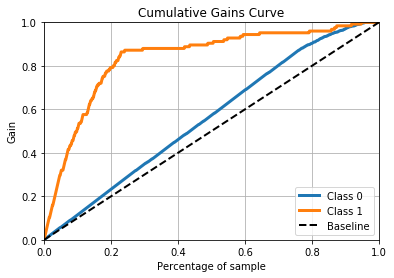

In [250]:
skplt.metrics.plot_cumulative_gain(y_test,tree2.predict_proba(x_test))

The plot shows that for example, (line: class 1) if the company wanted to reach the first 20% of cutomers who will churn with a campaign to decrease their probablility of churning then, using this model the company will be able to reach exatly 80% of the whole population of churning customers through targeting the first group of customers. 

Building the lift curve

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


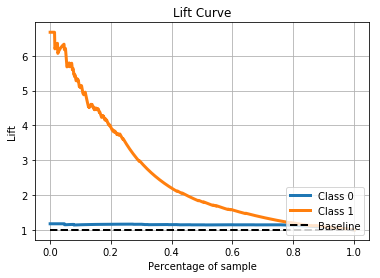

In [251]:
skplt.metrics.plot_lift_curve(y_test,tree2.predict_proba(x_test))

The lift curve is similar to gain curve, it slightly decrases as the more group of customers are included.